## Using Colors and Color Maps I

## 1.  Parallel plots:  Fisher's irises

Load the fisher iris data.

In [1]:
%matplotlib inline

import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib as mpl
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,:4]
col_labels = iris.feature_names
df = pd.DataFrame(X, columns=col_labels)

Here are the attributes the `sklearn` data object has.  The attributes are common to many
of the `sklearn` data sets.

In [2]:
iris.viewkeys()

dict_keys(['target_names', 'data', 'target', 'DESCR', 'feature_names'])

Fisher's data sets contains data on 3 species of iris.

In [ ]:
iris.target_names

In [ ]:
iris.target

`iris.target` is a 1D numpy array with the 3 targets assigned
as ints (0,1,2) and iris.data is a numpy array with the 4 attributes.

In [ ]:
iris.feature_names

The data contains measurements for 4 morphological (shape-related) attributes
of irises.

In [ ]:
print iris.DESCR

Next we draw what is known as a **parallel coordinates** plot of the data.  See the reference section
for more on such plots.
 
The x-axis is for the 4 morphological attributes, the y-axis for their values.  We draw lines containing
the values of the attributes for all data points, choosing the line color according to class.
We first draw the line for one particular data point, iris 0, the first iris among
our 150 exexamplar.  By itself it tells us little.

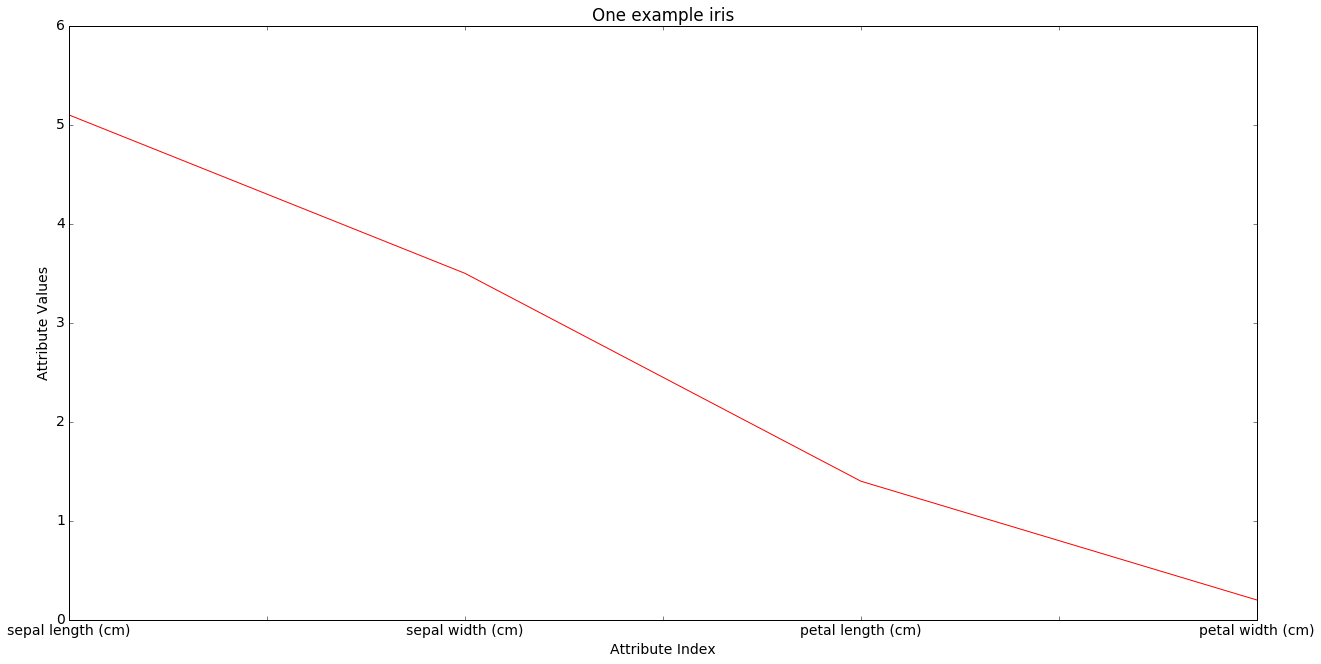

In [3]:
plt.figure(figsize=(20,10)) 
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['font.size'] = 14


#Choose a color
if iris.target[0] == 0:
        pcolor = "r"
elif iris.target[0] == 1:
        pcolor = "b"
elif iris.target[0] == 2:
        pcolor = "c"
# identify the row to be plotted.
dataRow = df.iloc[0,:]
# `pandas` plot method uses matplotlib under the hood.
dataRow.plot(color=pcolor)
plt.title("One example iris")
plt.xlabel("Attribute Index")
plt.ylabel(("Attribute Values"))
## Draw
#plt.show()

In the next cell we draw all 150 data lines.  What we are doing is visualizing points in a 4-dimensional space.

We are looking for regularities within the classes, and there are some.  We see condirable
separation of the red class on the petal attributes, and a trend toward separation of the blue
and green class on sepal attributes.  But note there is considerable overlap as well.  This is
part of why those classes are harder to separate.  Note also the the blue and greem classes
move in parallel; they rise and fall together.  This, together with the overlap, is why they
are harder to separate.

Nevertheless, what we are seeing is consierable structure in the way the attributes are distributed.
Compare the next example.

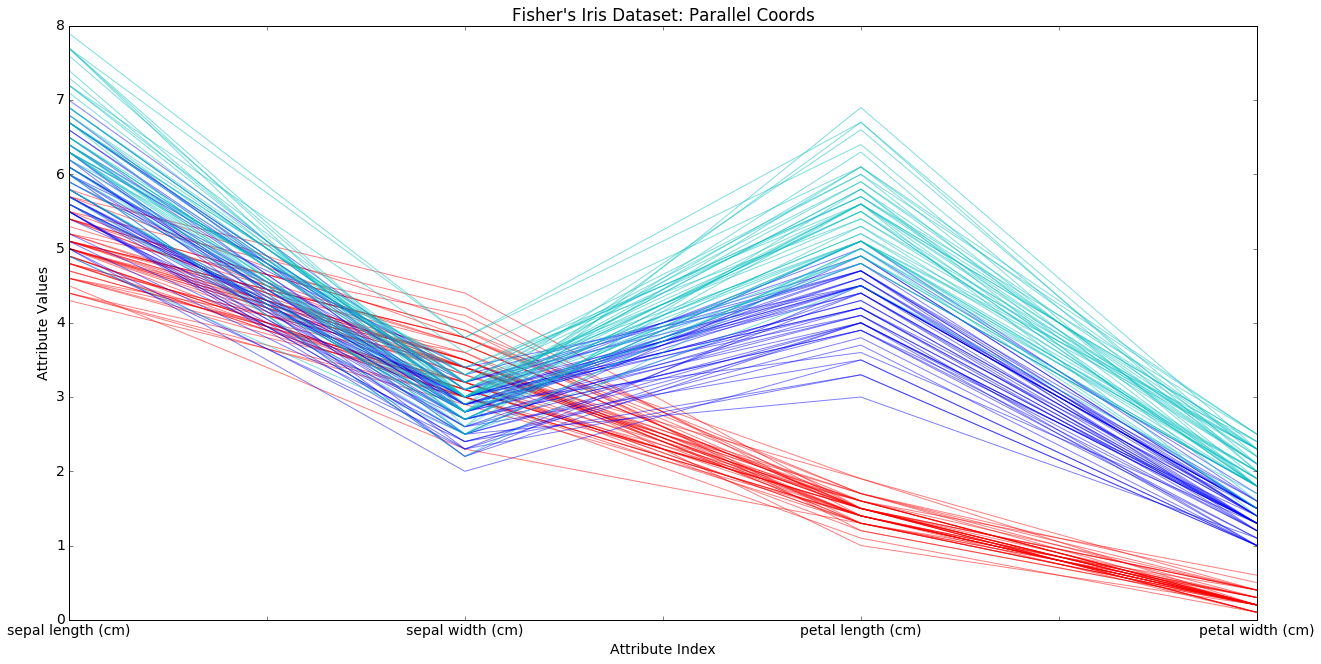

In [4]:
plt.figure(figsize=(20,10)) 
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['font.size'] = 14


for i in range(len(X)):
    #assign color based on Fisher's classes 0, 1 or 2
    if iris.target[i] == 0:
        pcolor = "r"
    elif iris.target[i] == 1:
        pcolor = "b"
    elif iris.target[i] == 2:
        pcolor = "c"

    #plot rows of data as if they were series data
    dataRow = df.iloc[i,:]
    dataRow.plot(color=pcolor, alpha=0.5)

### Add some essentials to the plot before drawing
plt.title("Fisher's Iris Dataset: Parallel Coords")
plt.xlabel("Attribute Index")
plt.ylabel(("Attribute Values"))
## Draw
#plot.show()

In [5]:
plt.figure(figsize=(20,10)) 
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['font.size'] = 14

nrows = len(X)
#nrows = 2

for i in range(nrows):
    #assign color based on Fisher's classes 0, 1 or 2
    if iris.target[i] == 0:
        pcolor = "r"
    elif iris.target[i] == 1:
        pcolor = "b"
    elif iris.target[i] == 2:
        pcolor = "c"

    #plot rows of data as if they were series data
    dataRow = df.iloc[i,:]



## Andrews plots:  A smoothed parallel coordinates plot

To draw a parallel coordinates plot of the iris data, we plotted each row as a colored line, connecting
the values of each attribute, and coloring according to class.  It's a really simple idea.

Now we'll do a small variant.  Instead of connecting with straight lines, we'll superimpose
the values of the row onto a curve.  And we'll construct the curve out of 4 **component curves**,
one for each of the 4 attributes in the iris data.

Here's one curve constructed out of two component curves.

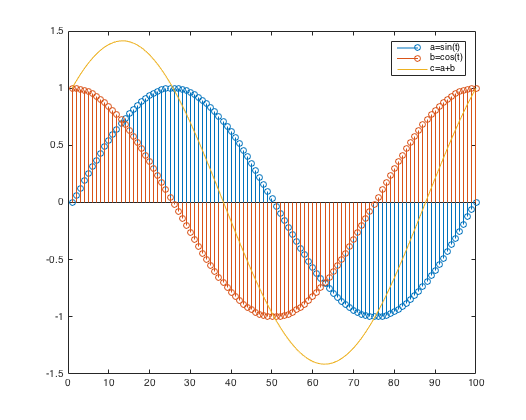

In [25]:
from IPython.display import Image 
Image(filename='two_components.png')

The yellow curve is the sum of the blue shaded curve and red shaded curve.  The blue curve is actually
a copy of the red curve; it has just been shifted to the right, so that the red curve's peaks and troughs are
always come a little earlier.  Now let's add one more **component**, a straight line:

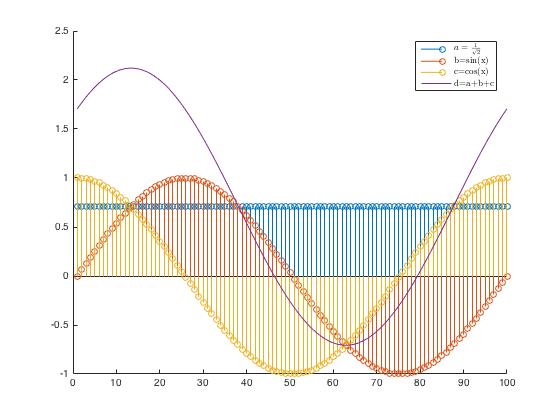

In [26]:
from IPython.display import Image 
Image(filename='three_components.png')

The purple curve labeled `d` is now the sum of three "curves", labeled `a`, `b`, and `c`. The peaks are slightly higher, and so are the troughs.  Let's add one more component to get up to 4, and that will be enough for drawing
our iris data:

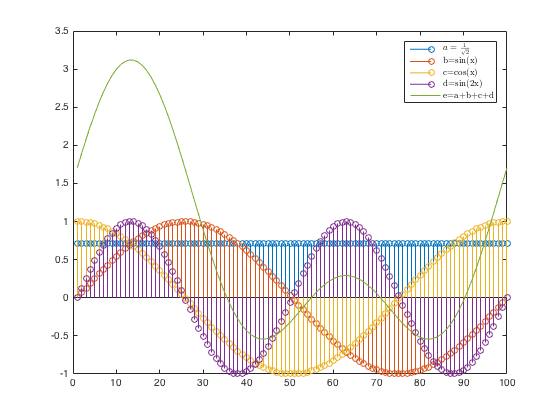

In [27]:
from IPython.display import Image 
Image(filename='four_components.png')

The shaded purple curve, labeled `d` here, is new and cycles a little faster than `b` and `c`.  As a result
the trough in `e` has been flipped into a mini-peak; in sum, we get a more complicated shape to the curve
`e`.

What we will do now is piggy back the information from one of our irises onto this more complicated curve `e`.
For us an iris, say `w`, is 4 numbers in an array. We're going to multiply each of those numbers
times one of the curve components.  

In [40]:
%%latex

$(w[0] * \frac{1}{\sqrt{2}}) + (w[1] * \sin{x}) + (w[2] * \cos{x}) +  (w[3]* \sin{2x})$

<IPython.core.display.Latex object>

We're going to do that to each of our irises and each iris component will affect the curve in the same
way, and hopefully we will see similarities in those component effects for irises of the same class.

Here's the effect of one iris on `e`, shown in the same plot with `e`.  Notice how the red iris curve straightens
out the smaller peak in the green `e` curve.  This loks a bit like
our 2-component curve.  As we'll see below, not all the irises will look like that.

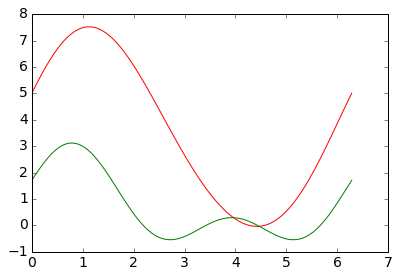

In [42]:
import numpy as np
sqrt2 = pow(2,0.5)
# We need an array of numbers for the x-values
x = np.linspace(0,2*np.pi,100)
M = df.values
w = M[0,:]
e = (1./sqrt2) + (np.sin(x)) + (np.cos(x)) + (np.sin(2*x))

def andrews_func (arr):
    """This takes a row of the iris table as an argument, """
    return (arr[0]/sqrt2) + (np.sin(t)*arr[1]) + (np.cos(t)*arr[2]) + (np.sin(2*t) * arr[3])

x = andrews_func(w)
# The iris line is red
plt.plot(t,x,c='r')
# The curve ofr 'e' is green
plt.plot(t,e,c='g')

Now, same idea, but we plot each row of the iris table, coloring the curves according
to class.

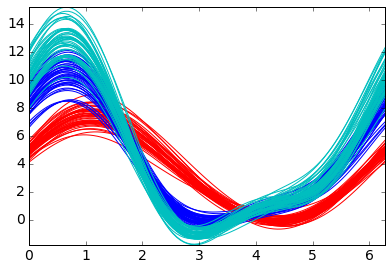

In [24]:
import numpy as np
sqrt2 = pow(2,0.5)
t = np.linspace(0,2*np.pi,100)
M = df.values
nrows = len(X)

def andrews_func (arr):
    """This takes a row of the iris table as an argument, """
    return (arr[0]/sqrt2) + (np.sin(t)*arr[1]) + (np.cos(t)*arr[2]) + (np.sin(2*t) * arr[3])

for i in range(nrows):
    #assign color based on Fisher's classes 0, 1 or 2
    if iris.target[i] == 0:
        pcolor = "r"
    elif iris.target[i] == 1:
        pcolor = "b"
    elif iris.target[i] == 2:
        pcolor = "c"

    #plot rows of data as if they were series data
    x = andrews_func(M[i,:])
    plt.plot(t,x,c=pcolor)

plt.autoscale(tight=True)

Once again, one class separates clearly, and the other two are a bit more entangled, but fairly
distinct in many places. 

Compare the results with our straight **parallel coordinates** plot.  Which does a better
job of separating all three classes?  Or are they equally bad?

## 2.  Abalone parallel plots:  Regression example (age prediction)

Let's go back to plain old parallel plots, which still pack a lot of
visualization power, and adapt some code and an example by Mike Bowles,
in his book *Machine Learning in Python*.

Fist load the abalone data.  This is a regression problem, predicting  a continuous value (age)
from continuous independent variables.

In [6]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plot
from math import exp
target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/abalone/abalone.data")
#read abalone data
abalone = pd.read_csv(target_url,header=None, prefix="V")
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
                   'Whole Wt', 'Shucked Wt',
                   'Viscera Wt', 'Shell Wt', 'Rings']
#get summary to use for scaling
summary = abalone.describe()
# We are going to use the max/min value for 'age' (number of rings
# to normalize ages)
minRings = summary.iloc[3,7]
maxRings = summary.iloc[7,7]
meanRings = summary.iloc[1,7]
sdRings = summary.iloc[2,7]

plt.clf()

The issue here is that since we are trying to predict age, so we don't have discrete classes to color.  We're using
various weight and length measurements to predict the age of the abalone, and using the number of
rings (stored in the `target` array) as our representation of age.  There's plenty of practical reasons
to want to predict the age from the other attributes, which are less costly to measure.

To color this data, then, we want a **color map**; a color map chooses from a range of colors
based on a number it is given.

We'll use a particular `matplotlib` color map called `RdYlBu`. Here's how it looks.

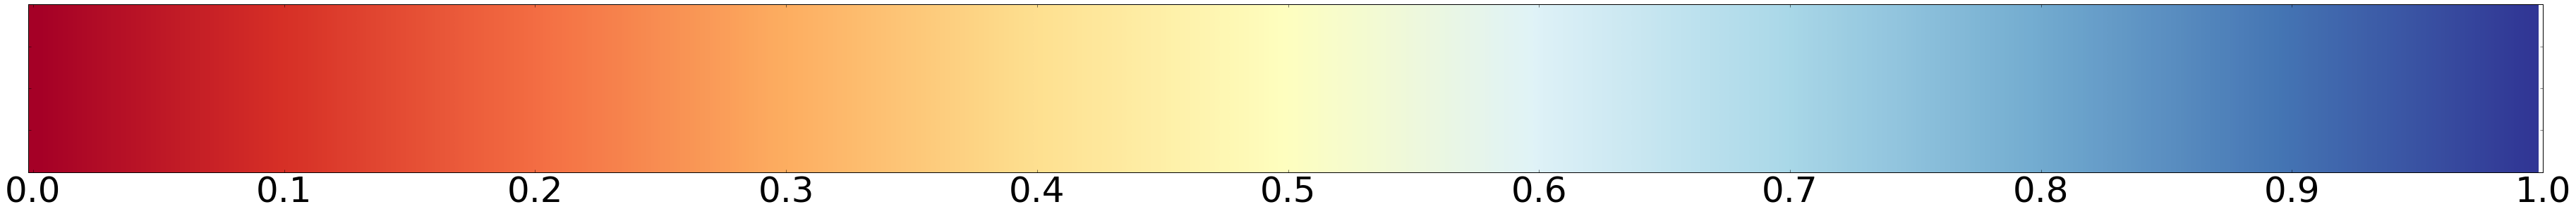

In [2]:

def draw_colormap (cmap_name,width=60,height=4,fontsize=50):
    """
    cmap_name is a string.
    """
    fig = plt.figure(figsize=(width,height)) 
    ax = plt.gca()
    mpl.rcParams['xtick.labelsize'] = fontsize
    mpl.rcParams['font.size'] = fontsize
    # Divide the interval from 0 to 1 into 256 parts.
    gradient = np.linspace(0, 1, 256)
    # The imshow function actually displays images,
    # but you can pass it an array.
    # In either case, the function wants 2D info.  
    # We give it an array with 2 rows,
    # make the top half and bottom half  of the image the same. 
    # We'll vertically stretch this very skinny image with aspect 'auto'.
    # And the value of gradient will change the color value from left to right.
    gradient = np.vstack((gradient, gradient))
    ax.imshow(gradient, aspect='auto',cmap=plt.get_cmap(cmap_name))
    # Show the number values associated with color on x-axis.
    # The xvalues that imshow uses are pixel numbers, integers from 0 to 256.
    ax.set_xticks(np.linspace(0,256,11))
    # We'll label those with the inputs to the color map, numbers from 0 to 1
    ax.set_xticklabels(np.linspace(0,1,11))
    ax.set_yticklabels([])
 
# Put in an color map name you like here.
cmap_name = 'RdYlBu'
draw_colormap(cmap_name)


The `RdYlBu` color map wants numbers between 0 and 1  and will make 
lower numbers in that range reddish, mid range number yellowish, and higher numbers bluish,
basically the range from hot to cool colors.

The cell below will draw
a **parallel plot** for the abalone data using these color values.  Patience.  This may take a while.  

1. The variable `labelColor` in the code below is the normalized age of the abalone exemplar
   we're drawing the line for. We pass this normalized age to our color map, which converts
   the age into a color.  The youngest abalone should be red, the oldest blue, allthe others
   some color in between, where "in between" means according to the color map shown above.
   We see that the young (reddest) abalone are concentrated in the lower part
   of the plot, indicating, not surprisingly, that they have lower measurements
   on all the attributes. 
2. There are many different colormaps (see 
   [matplotlib colormaps demo](http://matplotlib.org/examples/color/colormaps_reference.html)).
   The `RdYlBu` map is what's called a **divergent** color map in the `mpl` docs:
   
    ```
    These colormaps have a median value (usually light in color) and vary
    smoothly to two different color tones at high and low values. Diverging
    colormaps are ideal when your data has a median value that is significant
    (e.g.  0, such that positive and negative values are represented by
    different colors of the colormap).
    ```
    
   Before mapping an age to a color the code below first
   **normalizes** the age.  We map the age to a number between 0 and 1 which
   represents what proportion of the way this age is from the minimum age to the maximum age.
3. We leave out non-numerical attributes.  In this case, there's only 1, the `Sex` column.

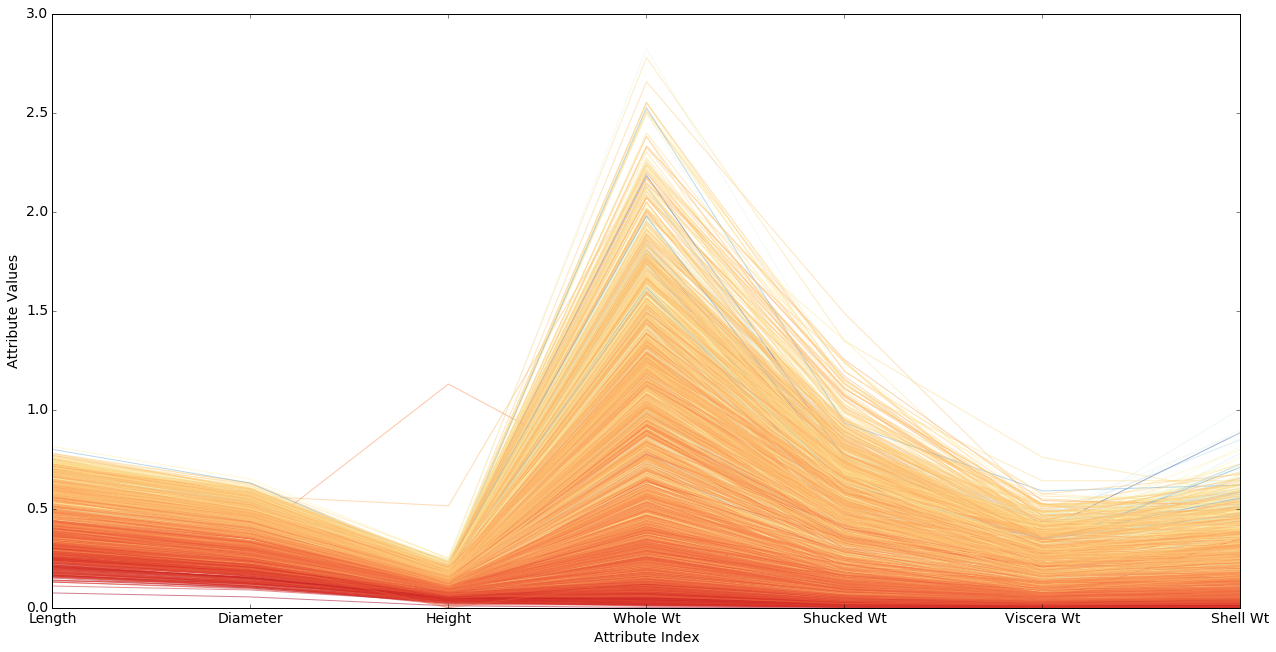

In [14]:
plt.figure(figsize=(20,10)) 
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['font.size'] = 14
for i in range(nrows):
    dataRow = abalone.iloc[i,1:8]
    # Getting the age info and "normalizing" it.
    labelColor = (abalone.iloc[i,8] - minRings) / (maxRings - minRings)
    # You can try this instead.  It doesnt help much.
    #labelColor = centered_age(abalone.iloc[i,8])
    #Choose color for this line based on how old the exemplar is
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)
    #Use the dsame color for every exemplar. Dull.
    #dataRow.plot(color=plot.cm.RdYlBu(.1), alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()

#renormalize using mean and standard variation, then compress
# with logit function

Note that almost all the colors fall in the red-yellow range.  That means the right hand half of the
color map shown in the cell above is almost entirely missing.

The problem is that our normalized data numbers don't make very good use of the color map.
The normalized age values go from about 0 to 1 as they should, but there are lots of abalone 
crowded into the reddish range and very few getting bluish colors.  That means we're wasting most of our color bandwidth. 

What we need to do is recenter our data so that the most heavily populated
part of the age range gets mapped to .5.

## 3. Abalone data using inverse logit transform

So we do a very common data transformation.  We do the logistic function, or `inverse-logit` of the normalized
ages:

$
x \mapsto ({1 + e^{-x}})^{-1}
$

This maps every centered age to a number between 0 and 1.

Note  that we're not going to change the **values** of the attributes
in any way, just the way the plot lines are interpreted as colors.  We'll get the same
overall silhouette for the plot.

In [8]:

def norm_age (x):
    """
    This is what we were doing in the first plot.
    """
    return (x - minRings) / (maxRings - minRings)

def centered_age (x):
    """
    Here's the first step in the new mapping. Center the data.
    
    Distance from mean divided by STD => distance above/below mean in
    STD units.
    """
    return (x - meanRings)/sdRings

def inverse_logit (x):
    return 1./(1 + np.exp(-x))

Here are some numbers to give you an idea of what `logit` does to the ages.   The first number is the
age and the last number is the count of the number of abalone exemplars of that age. 
In between are the normalized ages and the inverse logit of the ages.
The most heavily populated part of the distribution
is age 9 with a normalized value of .29 and a logit value of .43,
so that very popular age has been moved to a value close to .5.
So we get yellow for that age, and evenly balanced blues and reds for the ages on either side.

In [11]:
from collections import Counter
# get the 9th column of the data, with the age info
ages = abalone.iloc[:,8]
(amax,amin) = ages.max(),ages.min()
# Keep track of how many exemplars there are of each age.
ctr = Counter(ages)
for i in range(amin,amax):
    print '{0:>2}  {1: .4f}   =>   {2:.4f}   {3:>3d}'.format(i, norm_age(i),inverse_logit(centered_age(i)),ctr[i])

 1   0.0000   =>   0.0589     1
 2   0.0357   =>   0.0787     1
 3   0.0714   =>   0.1043    15
 4   0.1071   =>   0.1370    57
 5   0.1429   =>   0.1780   115
 6   0.1786   =>   0.2279   259
 7   0.2143   =>   0.2870   391
 8   0.2500   =>   0.3544   568
 9   0.2857   =>   0.4281   689
10   0.3214   =>   0.5051   634
11   0.3571   =>   0.5819   487
12   0.3929   =>   0.6550   267
13   0.4286   =>   0.7213   203
14   0.4643   =>   0.7792   126
15   0.5000   =>   0.8280   103
16   0.5357   =>   0.8678    67
17   0.5714   =>   0.8995    58
18   0.6071   =>   0.9243    42
19   0.6429   =>   0.9433    32
20   0.6786   =>   0.9578    26
21   0.7143   =>   0.9687    14
22   0.7500   =>   0.9769     6
23   0.7857   =>   0.9829     9
24   0.8214   =>   0.9874     2
25   0.8571   =>   0.9907     1
26   0.8929   =>   0.9932     1
27   0.9286   =>   0.9950     2
28   0.9643   =>   0.9963     0


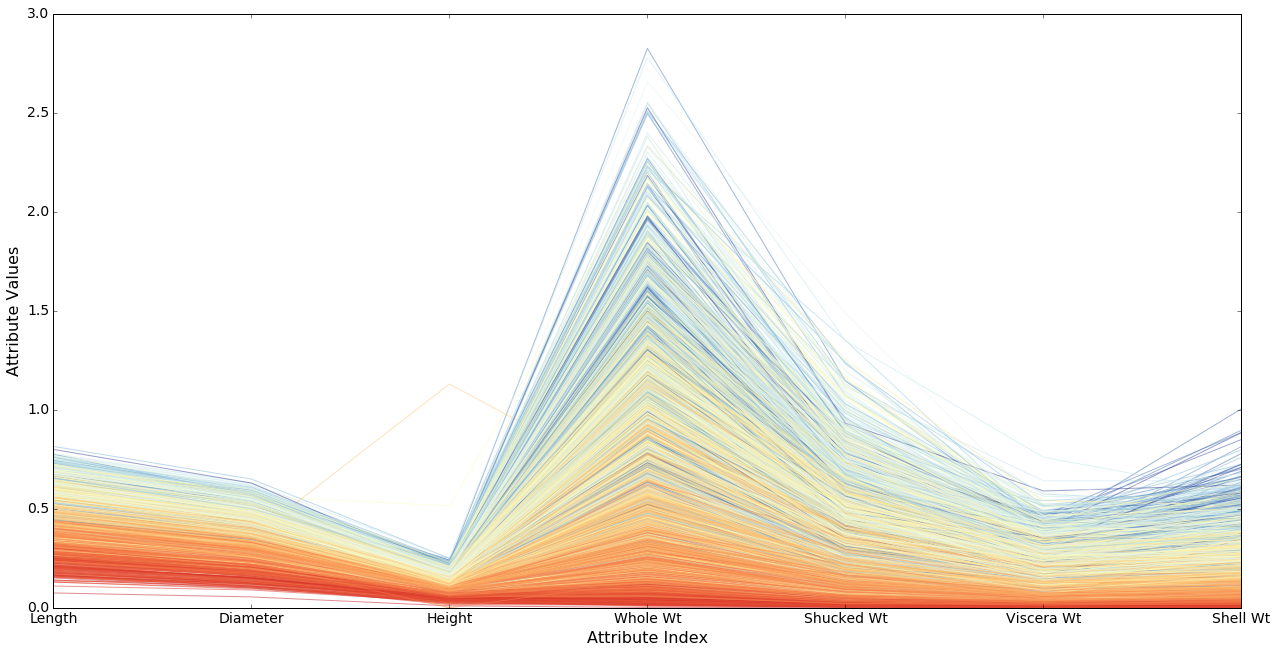

In [13]:
plt.figure(figsize=(20,10)) 
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['font.size'] = 14

# When experimenting with drawing params, draw only a subset of
# the rows, to reduce waittime
# nrows = 100
# Or set it back to what it should be
nrows = len(abalone.index)

for i in range(nrows):
    dataRow = abalone.iloc[i,1:8]
    # Center the data point
    normTarget = (abalone.iloc[i,8] - meanRings)/sdRings
    # Do inverse logit
    labelColor = 1.0/(1.0 + exp(-normTarget))
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)

plot.xlabel("Attribute Index",fontsize=16)
plot.ylabel("Attribute Values",fontsize=16)
#plot.show()

Now we can see the picture is considerable richer than it looked before.  There are a large number of cases of older abalone with smaller than expected measurements (the darker stripes in various strata), and it looks as if
those exemplars are consistently displaced.  That is, if you have a smaller than average whole weight for your age,
then you are likely to have a smaller than average height.  If that's true of all the attributes, the age of those exemplars is going to be hard  to predict.

## When it doesn't work

Parallel coordinate plots don't always work.  That is they don't always reveal pleasing
regularities in the ways the classes you're interested in realize their attributes.

To show this, let's use another Mike Bowles example, and go back to 
a classification problem.

Rock v. Mines data.  2 classes, two colors.  Showing only 8 of 60 attributes below.

What goes wrong?

In [15]:
__author__ = 'mike_bowles'
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")
plt.figure(figsize=(20,10)) 
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['font.size'] = 14


#read rocks versus mines data into pandas data frame
rocksVMines = pd.read_csv(target_url,header=None, prefix="V")

In [16]:
print len(rocksVMines)
print rocksVMines.columns
# V60, the last column, is non-numerical; it's the one we're predicting
print set(rocksVMines.iloc[:,60].values)

208
Index([u'V0', u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9',
       u'V10', u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18',
       u'V19', u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27',
       u'V28', u'V29', u'V30', u'V31', u'V32', u'V33', u'V34', u'V35', u'V36',
       u'V37', u'V38', u'V39', u'V40', u'V41', u'V42', u'V43', u'V44', u'V45',
       u'V46', u'V47', u'V48', u'V49', u'V50', u'V51', u'V52', u'V53', u'V54',
       u'V55', u'V56', u'V57', u'V58', u'V59', u'V60'],
      dtype='object')
set(['R', 'M'])


Making use of the very useful `pandas` `describe` method on dataframes, which prints out a number
of statistics about the data.

In [21]:
summary = rocksVMines.describe()
rocksVMines.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


Note that the summary object returned by `rocksVMines.describe()` is itself a data frame, and can be
used to find out a statistic about an attribute.  For example, to find out the mean of `V3`, do

In [24]:
summary.iloc[1,3]

0.053892307692307684

Note the maxes, means, stds, and medians rise steadily as we move rightwards, but by the time we
get to `V50` they're down again.  Hmm.

It turns out this is sonar Time Series data, meaning we're looking at data points taken from
successive moments in time. The data is also cyclic, and it rises and falls, wavelike.

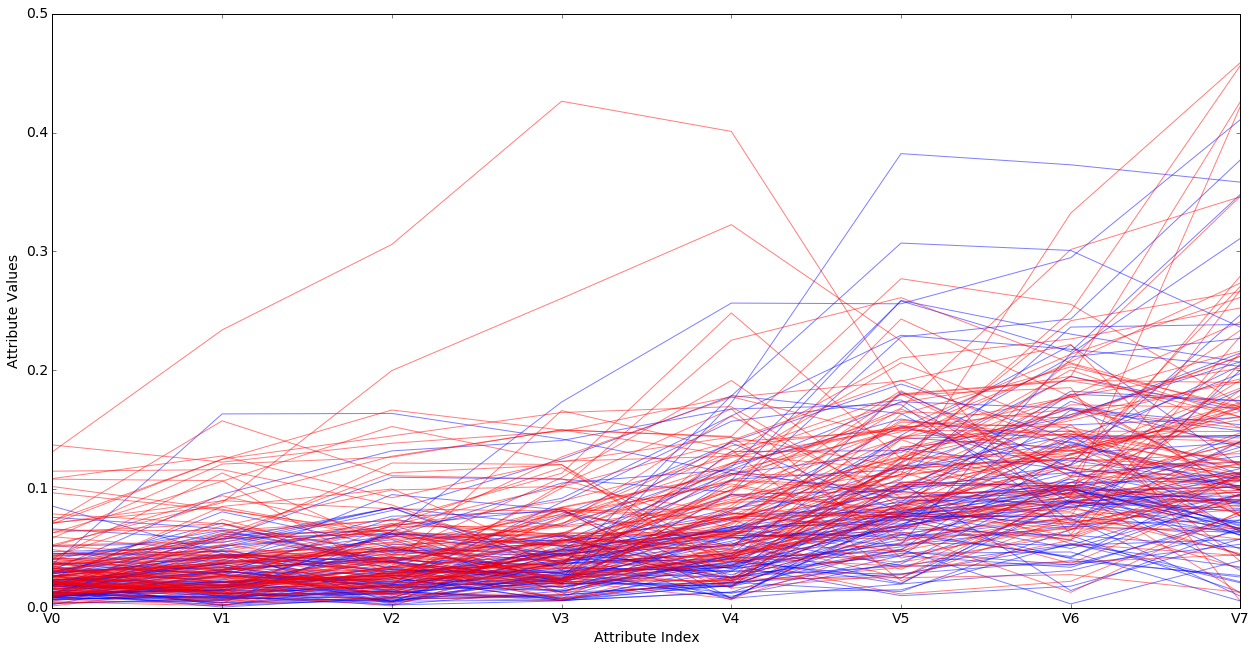

In [18]:
plt.figure(figsize=(20,10)) 
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['font.size'] = 14
for i in range(208):
    #assign color based on color based on "M" or "R" labels
    if rocksVMines.iat[i,60] == "M":
        pcolor = "red"
    else:
        pcolor = "blue"

    #plot just 20 rows of data as if they were series data
    dataRow = rocksVMines.iloc[i,0:8]
    dataRow.plot(color=pcolor, alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
#plot.show()

It looks as if there may be a tendency for very low values of most of the attributes to be rocks (blue), but there's considerable mixing of the classes for many values and many attributes.  In other words, it's a mess.

## Homework

Here is some wine data. The last column is what's to be predicted, the quality.  For some
reason, the quality of the wine is represented as an integer
from 3 to 8, with an average value of 5.6.  So bad wine gets a score of 3, and
the best wine a score of 8.

In [26]:
target_url = ("http://archive.ics.uci.edu/ml/machine-"
 "learning-databases/wine-quality/winequality-red.csv")

wine = pd.read_csv(target_url,header=0, sep=";")

#print column names in order to have the full versions
print(wine.columns)

#change column names to shorter ones to fit graph
wine.columns = ['fixAcid', 'volAcid', 'citAcid',
    'resSugr', 'chlor', 'frSO2', 'totSO2',
    'dens', 'pH', 'sulpha', 'alcohol', 'quality']

#generate statistical summaries
summary = wine.describe()
nrows = len(wine.index)
tasteCol = len(summary.columns)
meanTaste = summary.iloc[1,tasteCol - 1]
sdTaste = summary.iloc[2,tasteCol - 1]
nDataCol = len(wine.columns) -1

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')


In [39]:
wine.describe()

,fixAcid,volAcid,citAcid,resSugr,chlor,frSO2,totSO2,dens,pH,sulpha,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As you can see the various columns have huge variety in the means, so it is helpful to center them all
and put them in STD units.  This means the maximums in all the columns will all be of comparable size.
The  next cell defines a copy of the wine data frame called `wineNormalized` in which the values of
all the attributes have all been centered.

In [ ]:
wineNormalized = wine
ncols = len(wineNormalized.columns)

for i in range(ncols):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    wineNormalized.iloc[:,i:(i + 1)] = \
        (wineNormalized.iloc[:,i:(i + 1)] - mean) / sd

Your job is to do a parallel plot of the wine data.  Use `logit` as in the second
abalone plot.  You can try both `wine` and `wineNormalized`, but do at least the latter.

## References

Bowles, M. (2015).  Machine Learning in Python.  (John Wiley, Indianapolis, IN).

Fisher,R.A. (1950). "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY). 

Wegman, E. J. (1990) Hyperdimensional data analysis using parallel coordinates. Journal of the American Statistical Association 85, 664-675.

Venables, W. N. and Ripley, B. D. (2002) Modern Applied Statistics with S. Fourth edition. (Springer, NY).

Wikipedia. 2016. Parallel coordinates. [Wikipedia page](https://en.wikipedia.org/wiki/Parallel_coordinates)